# Visualization and Plotting using Pandas

## Grocery Data Example

In [2]:
import pandas
groceries = pandas.read_csv('groceries.csv') 
groceries

,ShoppingDate,Category,GroceryItem,CostPerItem,Quantity
0,23/04/2022,Baking,Rich Chocolate Cake Cake Mix,7.35,1
1,23/04/2022,Baking,Wild Blue Berry Muffins Cake Mix,3.56,5
2,23/04/2022,Baking,Desiccated Coconut,9.72,1
3,23/04/2022,Baking,White Paper Muffin Cases,0.76,1
4,23/04/2022,Baking,Dry Yeast,6.69,1
...,...,...,...,...,...
985,3/09/2022,Treats,Caramel/cookie slice,4.98,1
986,3/09/2022,Vegetables,Cabbage,4.00,1
987,3/09/2022,Vegetables,Red Capsicum,2.90,1
988,3/09/2022,Vegetables,Butternut Pumpkin,5.12,1


<style>
    .jp-RenderedMarkdown {
  background-color: yellow;
}
</style>  

<div style="background-color:palegreen">
<h3>How to compute a new Pandas DataFrame column</h3>
    
Example:

```bash
    mydataframe['newColumn'] = mydataframe.Column1 - mydataframe.Column2 / mydataframe.Column3
```
</div>

In [3]:
# Compute a new TotalCost column for each row (CostPerItem x Quantity)
groceries['TotalCost'] = groceries.CostPerItem * groceries.Quantity
groceries

,ShoppingDate,Category,GroceryItem,CostPerItem,Quantity,TotalCost
0,23/04/2022,Baking,Rich Chocolate Cake Cake Mix,7.35,1,7.35
1,23/04/2022,Baking,Wild Blue Berry Muffins Cake Mix,3.56,5,17.80
2,23/04/2022,Baking,Desiccated Coconut,9.72,1,9.72
3,23/04/2022,Baking,White Paper Muffin Cases,0.76,1,0.76
4,23/04/2022,Baking,Dry Yeast,6.69,1,6.69
...,...,...,...,...,...,...
985,3/09/2022,Treats,Caramel/cookie slice,4.98,1,4.98
986,3/09/2022,Vegetables,Cabbage,4.00,1,4.00
987,3/09/2022,Vegetables,Red Capsicum,2.90,1,2.90
988,3/09/2022,Vegetables,Butternut Pumpkin,5.12,1,5.12


<div style="background-color:palegreen">

### How to compute a new Pandas column using a Python function

Example:
```bash    
    def my_function(row) :
        if row.a == 7 :
            return row.c + row.d
        else
            return 42
            
    mydataframe['newCol'] = mydataframe.apply(my_function, axis=1)
```
</div>

In [4]:
# Change the TotalCost calculation so that a 10% discount is applied to an item if the quantity purchased is more than 5.

def computeDiscount(row) :
    total = row.CostPerItem * row.Quantity
    if row.Quantity > 5 :
        total -= 0.1 * total
    return total

groceries['TotalCost'] = groceries.apply(computeDiscount, axis=1)
groceries

,ShoppingDate,Category,GroceryItem,CostPerItem,Quantity,TotalCost
0,23/04/2022,Baking,Rich Chocolate Cake Cake Mix,7.35,1,7.35
1,23/04/2022,Baking,Wild Blue Berry Muffins Cake Mix,3.56,5,17.80
2,23/04/2022,Baking,Desiccated Coconut,9.72,1,9.72
3,23/04/2022,Baking,White Paper Muffin Cases,0.76,1,0.76
4,23/04/2022,Baking,Dry Yeast,6.69,1,6.69
...,...,...,...,...,...,...
985,3/09/2022,Treats,Caramel/cookie slice,4.98,1,4.98
986,3/09/2022,Vegetables,Cabbage,4.00,1,4.00
987,3/09/2022,Vegetables,Red Capsicum,2.90,1,2.90
988,3/09/2022,Vegetables,Butternut Pumpkin,5.12,1,5.12


In [5]:
# What is the total cost of all groceries purchased?
groceries.TotalCost.sum() 
# Answer should be $7620.38

7620.38

<div style="background-color:palegreen">

### How to use a group by query in Pandas

Examples:
```bash      
    mydataframe.groupby('my_column').other_column.mean()
    mydataframe.groupby('my_column').other_column.sum()
    mydataframe.groupby('my_column').other_column.min()
``` 
</div>

In [5]:
# Use a group by to compute the total groceries purchased on each Shopping Date
totals_by_date = groceries.groupby('ShoppingDate').TotalCost.sum()
totals_by_date

ShoppingDate
11/06/2022    416.223
13/08/2022    427.179
14/05/2022    473.349
16/07/2022    313.698
18/06/2022    349.115
2/07/2022     323.816
20/08/2022    387.014
21/05/2022    421.975
23/04/2022    272.595
23/07/2022    319.493
25/06/2022    416.584
27/08/2022    350.795
28/05/2022    449.846
3/09/2022     327.498
30/04/2022    400.880
30/07/2022    492.790
4/06/2022     402.401
6/08/2022     352.127
7/05/2022     293.628
9/07/2022     429.374
Name: TotalCost, dtype: float64

<div style="background-color:palegreen">

### How to Visualize a Pandas DataFrame as a line plot

Example:
```bash     
    ax = mydataframe.plot(figsize=(width, height)) # width and height specified in inches
    ax.set_title('My Title')
    ax.set_xlabel('My X axis label')
    ax.set_ylabel('My Y axis label')
```
</div>

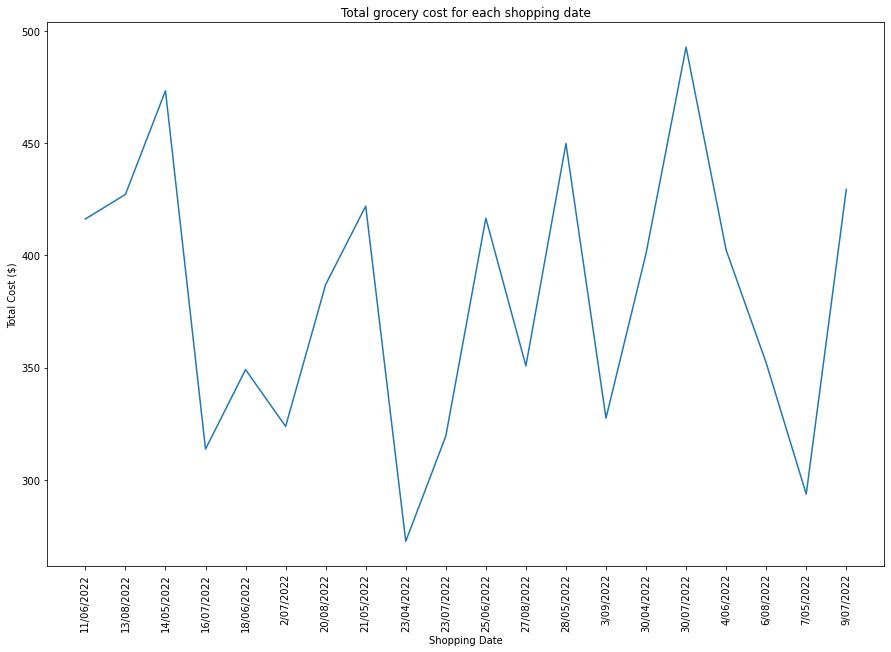

In [6]:
# Plot this data as a line graph with an appropriate title and axis labels
# Hint: use the following code to display all 20 dates on the X-axis
#   date_labels = totals_by_date.index
#   ticks = ax.set_xticks(range(len(date_labels)), date_labels, rotation =90)

ax = totals_by_date.plot(figsize=(15,10))
ax.set_title('Total grocery cost for each shopping date')
ax.set_xlabel('Shopping Date')
ax.set_ylabel('Total Cost ($)')
dates = totals_by_date.index
ticks = ax.set_xticks(range(len(dates)), dates, rotation =90)

<div style="background-color:palegreen">

### How to Visualize a Pandas DataFrame as a bar plot

Example:
```bash     
    ax = mydataframe.plot.bar(figsize=(width, height)) # width and height specified in inches
```
</div>

Text(0, 0.5, 'Total Cost ($)')

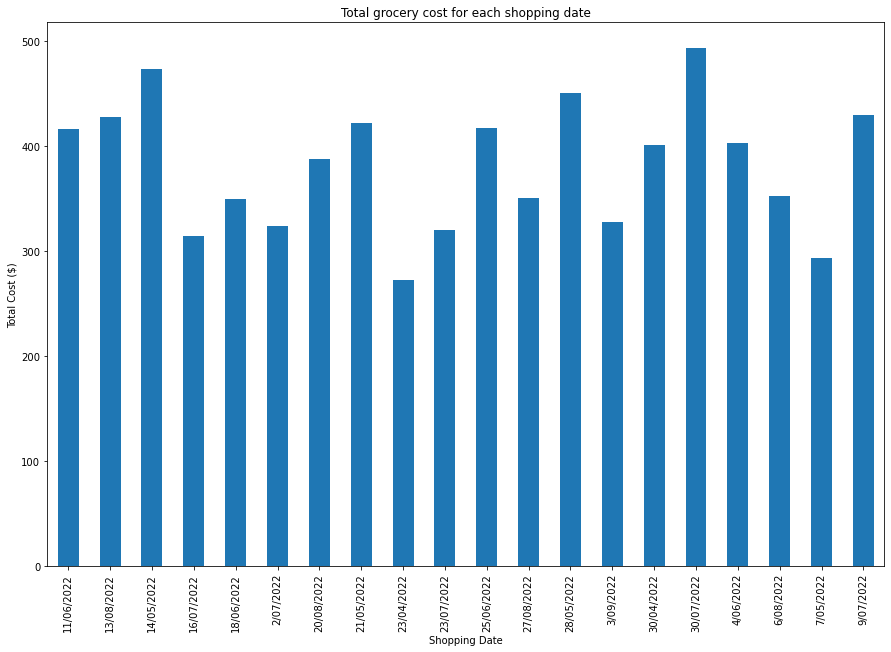

In [7]:
# Now visualize it using a bar graph instead
ax = totals_by_date.plot.bar(figsize=(15,10))
ax.set_title('Total grocery cost for each shopping date')
ax.set_xlabel('Shopping Date')
ax.set_ylabel('Total Cost ($)')

In [8]:
# Use a group by to compute the total groceries purchased for each Category
totals_by_category = groceries.groupby('Category').TotalCost.sum()
totals_by_category

Category
Bakery           202.622
Baking           757.354
Bathroom         643.864
Cereal            53.190
Cleaning         244.710
Dogs              99.516
Freezer          586.184
Fridge           398.636
Fruit            264.616
Herbs/Spices     436.352
Meat             344.194
Medical          263.107
Pantry          1639.323
Pasta/Rice       216.256
Sauces           220.540
Treats           556.186
Vegetables       693.730
Name: TotalCost, dtype: float64

Text(0, 0.5, 'Total Cost ($)')

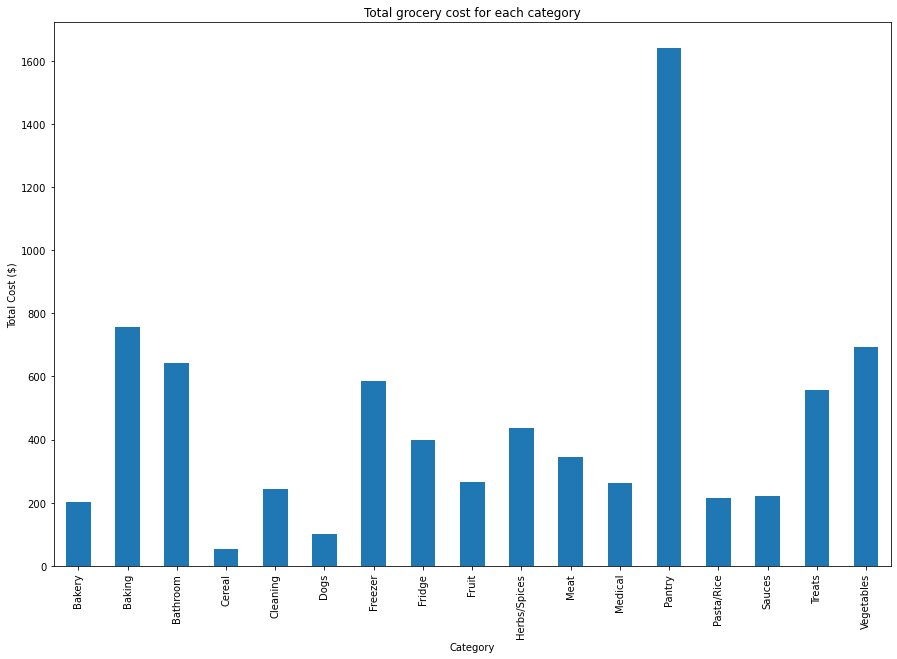

In [9]:
# Visualize category data using a bar graph
ax = totals_by_category.plot.bar(figsize=(15,10))
ax.set_title('Total grocery cost for each category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Cost ($)')

<div style="background-color:palegreen">

### How to Visualize a Pandas DataFrame as a pie plot

Example:
```bash     
    ax = mydataframe.plot.pie(figsize=(width, height), autopct='%.1f%%') # width and height specified in inches
```
</div>

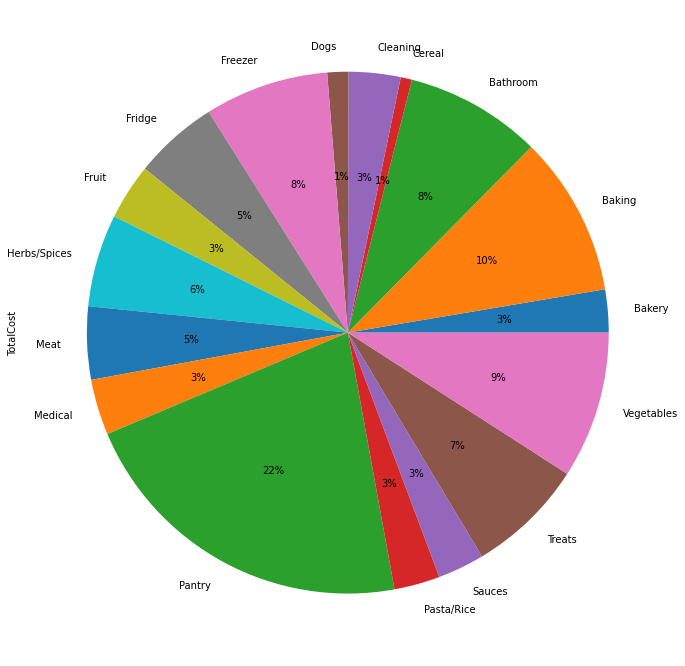

In [10]:
# Visualize the category data using a pie chart with percentages shown for each slice. 
ax = totals_by_category.plot.pie(figsize=(12,12), autopct='%.0f%%')

<div style="background-color:palegreen">

### How to use a group by with more than one column in Pandas

Examples:
```bash      
    mydataframe.groupby(['column1', 'column2']).other_column.mean()
    mydataframe.groupby(['column1', 'column2']).other_column.sum()
    mydataframe.groupby(['column1', 'column2']).other_column.min()
``` 
</div>

In [11]:
# Group by both the ShoppingDate and the Category and compute the total cost for each group
byDateAndCategory = groceries.groupby(['ShoppingDate','Category'])['TotalCost'].sum()
byDateAndCategory

ShoppingDate  Category  
11/06/2022    Bakery         27.510
              Baking        129.484
              Bathroom       35.986
              Cleaning       15.100
              Dogs            1.780
                             ...   
9/07/2022     Pantry         55.930
              Pasta/Rice      6.760
              Sauces          1.240
              Treats         11.790
              Vegetables     18.010
Name: TotalCost, Length: 295, dtype: float64

In [12]:
# What happens if you apply the unstack() method to these results?
byDateAndCategory.unstack()

Category,Bakery,Baking,Bathroom,Cereal,Cleaning,Dogs,Freezer,Fridge,Fruit,Herbs/Spices,Meat,Medical,Pantry,Pasta/Rice,Sauces,Treats,Vegetables
ShoppingDate,,,,,,,,,,,,,,,,,
11/06/2022,27.510,129.484,35.986,NaN,15.100,1.780,9.100,39.020,2.140,8.670,4.940,NaN,46.510,8.130,5.510,16.800,65.543
13/08/2022,3.400,63.180,20.300,NaN,15.490,1.780,60.809,51.156,14.820,10.790,77.624,1.370,54.480,3.100,9.270,23.950,15.660
14/05/2022,10.460,6.790,47.940,NaN,12.500,3.980,76.370,11.940,15.360,31.500,20.560,NaN,199.959,3.860,8.740,5.730,17.660
16/07/2022,38.682,36.300,20.170,12.29,24.786,3.380,10.010,31.620,6.150,9.070,18.280,5.140,38.640,6.630,0.170,10.120,42.260
18/06/2022,NaN,18.490,62.047,6.07,4.200,36.666,20.230,3.870,2.040,24.070,18.640,NaN,45.890,7.430,4.300,14.460,80.712
2/07/2022,NaN,24.411,16.890,5.48,9.150,NaN,7.360,12.950,NaN,10.490,21.220,24.600,64.570,8.770,16.550,88.345,13.030
20/08/2022,6.850,25.290,33.120,NaN,13.400,4.400,33.390,8.170,61.236,22.010,14.520,12.780,82.450,10.190,12.320,22.790,24.098
21/05/2022,4.410,58.508,31.440,NaN,NaN,NaN,12.840,25.810,NaN,53.526,NaN,78.207,96.424,NaN,13.710,17.560,29.540
23/04/2022,14.010,49.440,22.940,NaN,NaN,4.400,5.970,8.320,10.780,24.010,NaN,7.800,84.323,9.960,12.112,11.710,6.820


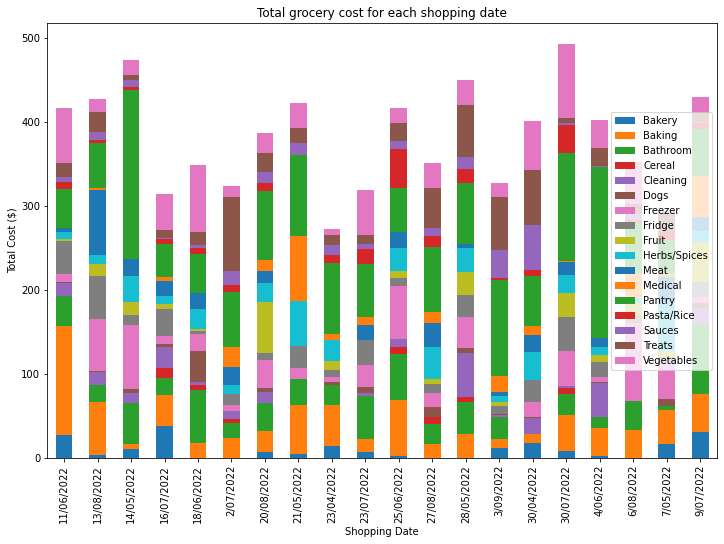

In [13]:
# Plot the resulting unstacked data as a stacked bar graph (set parameter stacked=True)
ax = byDateAndCategory.unstack().plot.bar(stacked=True, figsize=(12,8))
ax.set_title('Total grocery cost for each shopping date')
ax.set_xlabel('Shopping Date')
ax.set_ylabel('Total Cost ($)')
legend = ax.legend(loc='right')

Text(0, 0.5, 'Total Items')

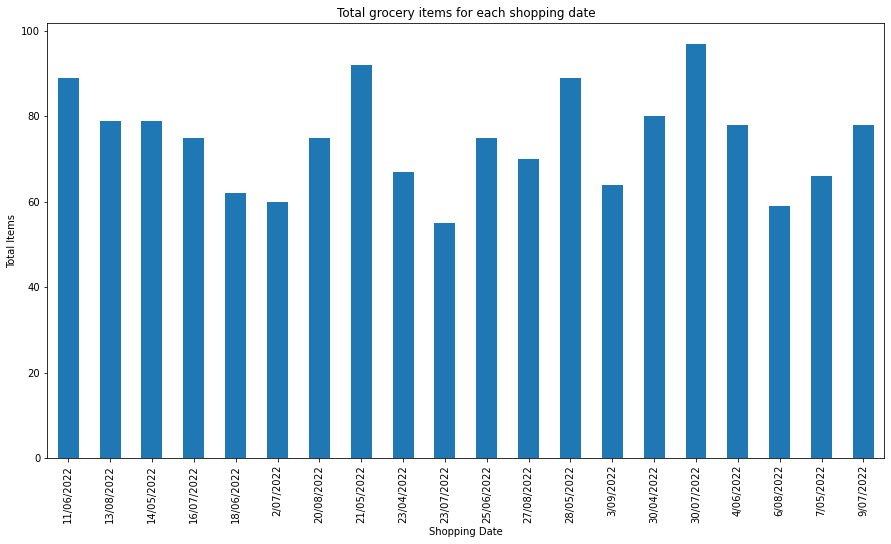

In [14]:
# Plot the total quantity of groceries purchased each week as a bar graph
ax = groceries.groupby(['ShoppingDate'])['Quantity'].sum().plot.bar(figsize=(15,8))
ax.set_title('Total grocery items for each shopping date')
ax.set_xlabel('Shopping Date')
ax.set_ylabel('Total Items')

## Weather Data Example

In [15]:
import pandas
weather = pandas.read_csv('BrisbaneDailyWeather.csv', index_col=0, parse_dates=[0])
weather

,MinTemp,MaxTemp,Rainfall
Date,,,
2022-02-13,18.6,29.3,7.2
2022-02-12,20.4,28.9,0.0
2022-02-11,19.1,31.3,0.0
2022-02-10,19.4,31.2,0.0
2022-02-09,18.6,30.0,0.0
...,...,...,...
1999-12-15,17.0,27.0,0.0
1999-12-14,17.0,26.0,0.2
1999-12-13,19.0,24.0,0.8


Text(0, 0.5, 'Temperature (C)')

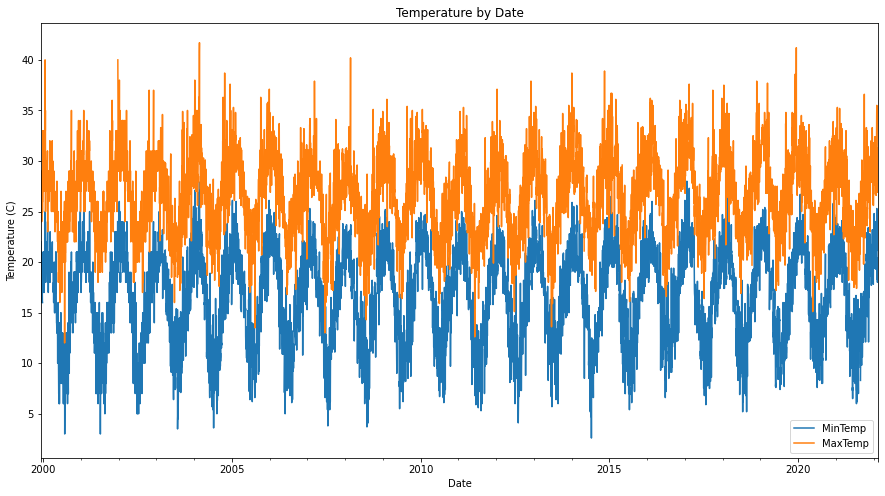

In [16]:
# Plot the MinTemp and MaxTemp columns together on a simple line plot
ax = weather[['MinTemp','MaxTemp']].plot(figsize=(15,8))
ax.set_title('Temperature by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (C)')

<div style="background-color:palegreen">

### How to access the parts of a DataFrame index of type date/time

Examples:
```bash      
    mydataframe.index.minute
    mydataframe.index.hour
    mydataframe.index.day
    mydataframe.index.day_name()
    mydataframe.index.day_of_week
    mydataframe.index.day_of_year    
    mydataframe.index.weekofyear 
    mydataframe.index.month
    mydataframe.index.month_name
    mydataframe.index.year  
``` 
</div>

In [17]:
# Use a group by to find the average Minimum and Maximum Temp for each day of the year
day_averages = weather.groupby(weather.index.day_of_year)[['MinTemp','MaxTemp']].mean()
day_averages
# Result should be 366 rows × 2 columns

,MinTemp,MaxTemp
Date,,
1,21.030435,29.834783
2,21.204348,30.486957
3,21.552174,29.734783
4,21.113043,29.665217
5,21.608696,30.150000
...,...,...
362,20.365217,28.630435
363,20.373913,29.678261
364,20.478261,30.086957


Text(0, 0.5, 'Temperature (C)')

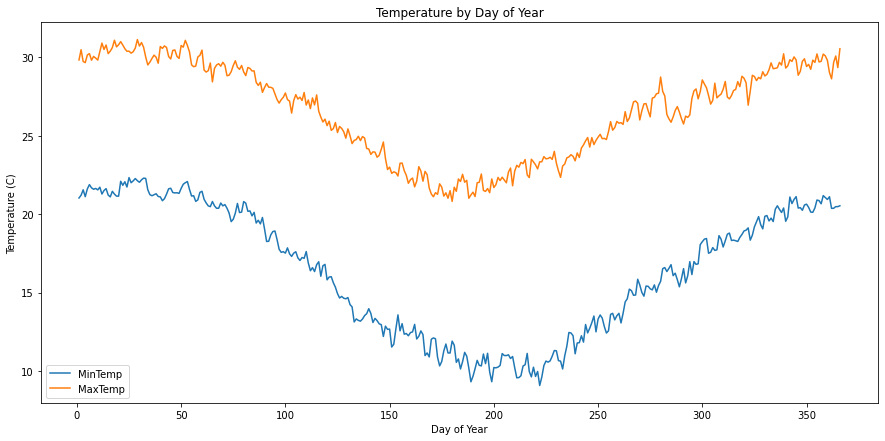

In [18]:
# Plot these day averages together on a single line plot
ax = day_averages.plot(figsize=(15,7))
ax.set_title('Temperature by Day of Year')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature (C)')

In [19]:
# Compute the statistical correlation between all variables in the weather data
# Which columns are closely correlated?
weather.corr()

,MinTemp,MaxTemp,Rainfall
MinTemp,1.000000,0.743777,0.152545
MaxTemp,0.743777,1.000000,-0.014784
Rainfall,0.152545,-0.014784,1.000000


<div style="background-color:palegreen">

### How to Visualize a Pandas DataFrame as a scatter plot

Example:
```bash     
    ax = mydataframe.plot.scatter(x='column1', y='column2')
```
</div>

Text(0.5, 1.0, 'MaxTemp vs MinTemp')

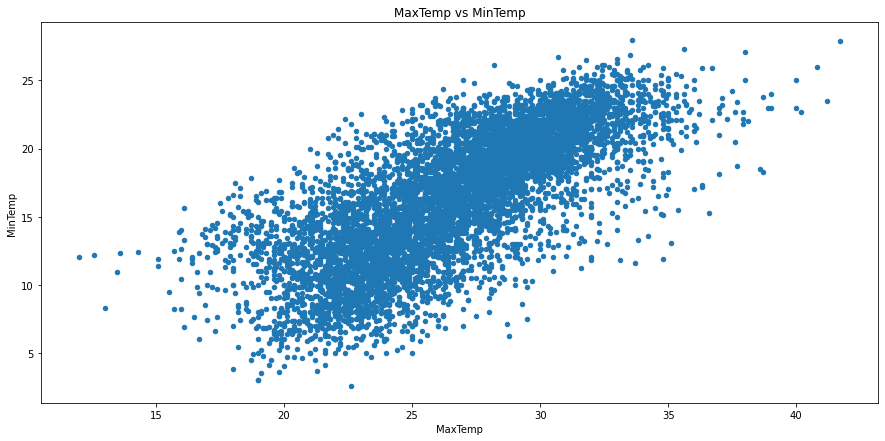

In [20]:
# Create a scatter plot of the minimum temperature vs the maximum temperate
# What pattern do you notice?
ax = weather.plot.scatter(figsize=(15,7), x='MaxTemp', y='MinTemp')
ax.set_title('MaxTemp vs MinTemp')

In [21]:
# Determine the minimum and maximum values of the MaxTemp column
weather.MaxTemp.describe()

count    8064.000000
mean       26.640650
std         3.801586
min        12.000000
25%        23.800000
50%        26.900000
75%        29.400000
max        41.700000
Name: MaxTemp, dtype: float64

<div style="background-color:palegreen">

### How to group by using bins

Example:
```bash  
    bins = range(lower, upper, step) # can use either a list or a range
    groups = mydataframe.groupby(pandas.cut('columnName', bins)).SomeOtherColumnName
```
</div>

In [22]:
# Divide the range of MaxTemp values into bins so that each bin covers 5 degrees
# Use a group by over these MaxTemp bins to explore how the MinTemp is correlated to the MaxTemp.
# For each group, use the agg method to compute:
#     max (100 percentile), 
#     75 percentile, 
#     mean (50 percentile), 
#     25 percentile and 
#     min (0 percentile) 

def q25(x) :
    return  x.quantile(0.25)
def q75(x) :
    return  x.quantile(0.75)

min_temps = weather.groupby(pandas.cut(weather.MaxTemp, range(10,44,5))).MinTemp 
correlation = min_temps.agg(['max',q75,'mean',q25,'min'])
correlation

,max,q75,mean,q25,min
MaxTemp,,,,,
"(10, 15]",12.4,12.275,11.350000,11.175,8.3
"(15, 20]",17.8,13.800,11.323377,8.675,3.0
"(20, 25]",22.9,14.700,12.427682,10.000,2.6
"(25, 30]",26.1,20.100,17.697548,15.700,5.9
"(30, 35]",28.0,22.900,21.160028,19.900,11.0
"(35, 40]",27.3,23.750,22.120896,21.100,13.1


Text(0, 0.5, 'MinTemp (C)')

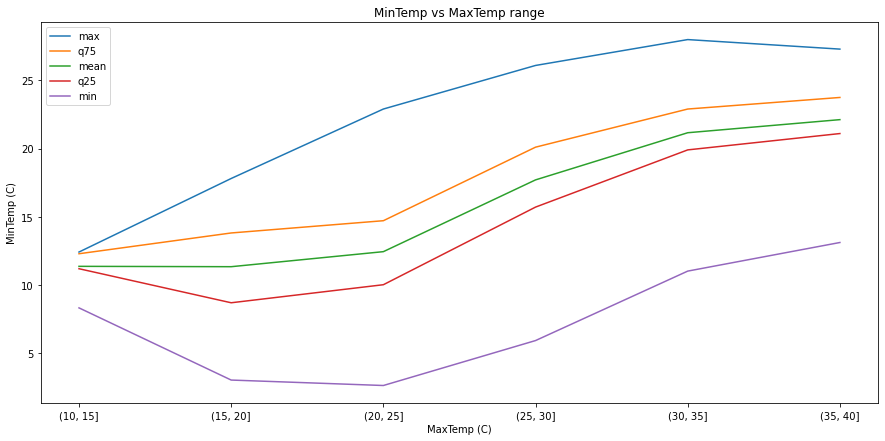

In [23]:
# plot the above data as a line graph.
ax = correlation.plot(figsize=(15,7))
ax.set_title('MinTemp vs MaxTemp range')
ax.set_xlabel('MaxTemp (C)')
ax.set_ylabel('MinTemp (C)')

<div style="background-color:palegreen">

### How to plot a line graph with error bars

Examples:
```bash  
    groups = mydataframe.plot(yerr=data.std(), ecolor='someColour', elinewidth=width, capsize=size,color='otherColour'))
```
</div>

Text(0, 0.5, 'MinTemp (C)')

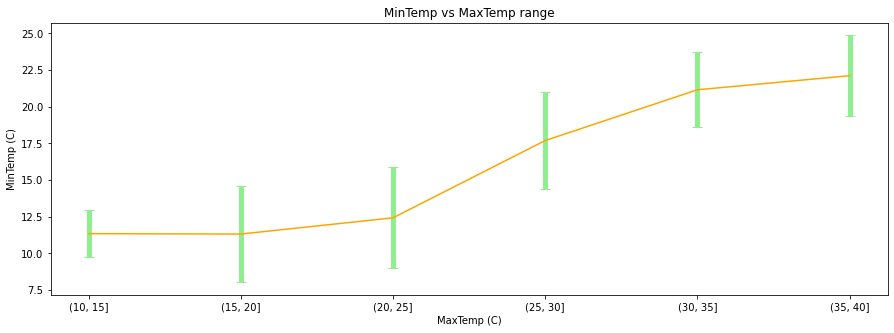

In [24]:
# Plot just the mean MinTemp, but use the standard deviation as the y error bar
ax = min_temps.mean().plot(figsize=(15,5), yerr=min_temps.std(), ecolor='lightgreen', elinewidth=5, capsize=5,color='orange')
ax.set_title('MinTemp vs MaxTemp range')
ax.set_xlabel('MaxTemp (C)')
ax.set_ylabel('MinTemp (C)')

In [25]:
# Compute a new column named month that contains the month number of the index
weather['month'] = weather.index.month

Text(0, 0.5, 'MaxTemp (C)')

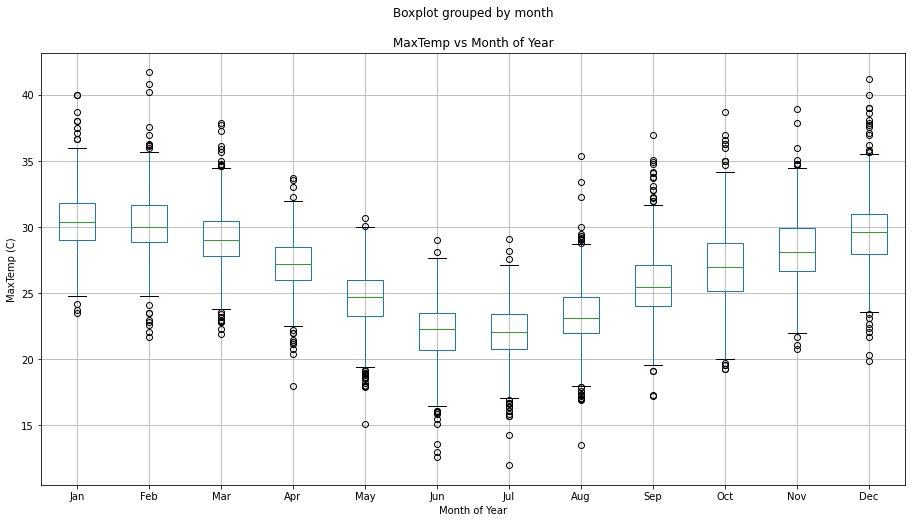

In [26]:
# Create  a box plot of the MaxTemp versus the month column
ax = weather.boxplot(column='MaxTemp', by='month', figsize=(15,8))
ax.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_title('MaxTemp vs Month of Year')
ax.set_xlabel('Month of Year')
ax.set_ylabel('MaxTemp (C)')

In [27]:
# Add friendly xtick labels to the above box plot
# Hint, use:
# ax.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [28]:
# Use a group by to compute the average maximum temperature for each month of the year
# Hint: groupby weather.index.month
max_temp_by_month = weather.groupby(weather.index.month).MaxTemp
max_temp_by_month.mean()

Date
1     30.428996
2     30.185533
3     29.120913
4     27.164840
5     24.514328
6     22.022424
7     22.034508
8     23.404399
9     25.719301
10    27.106657
11    28.317906
12    29.617454
Name: MaxTemp, dtype: float64

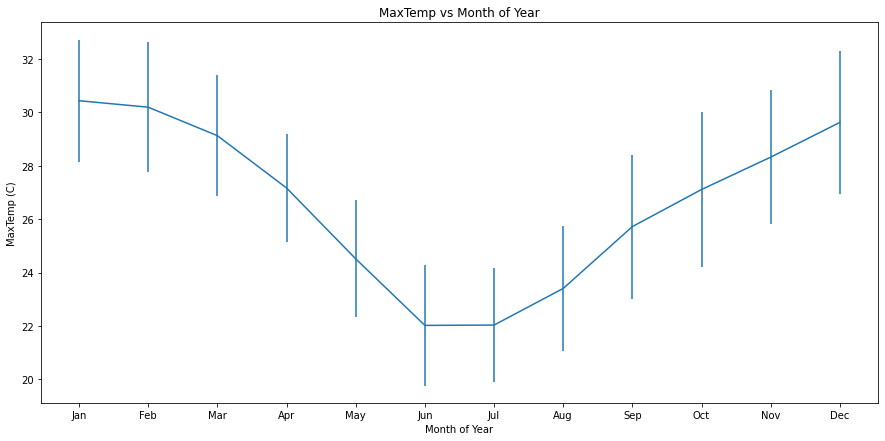

In [29]:
# Plot the above average maximum temperature for each month of the year and use the standard deviation as the y error bar
ax = max_temp_by_month.mean().plot(figsize=(15,7), yerr=max_temp_by_month.std())
ax.set_title('MaxTemp vs Month of Year')
ax.set_xlabel('Month of Year')
ax.set_ylabel('MaxTemp (C)')
ticks = ax.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

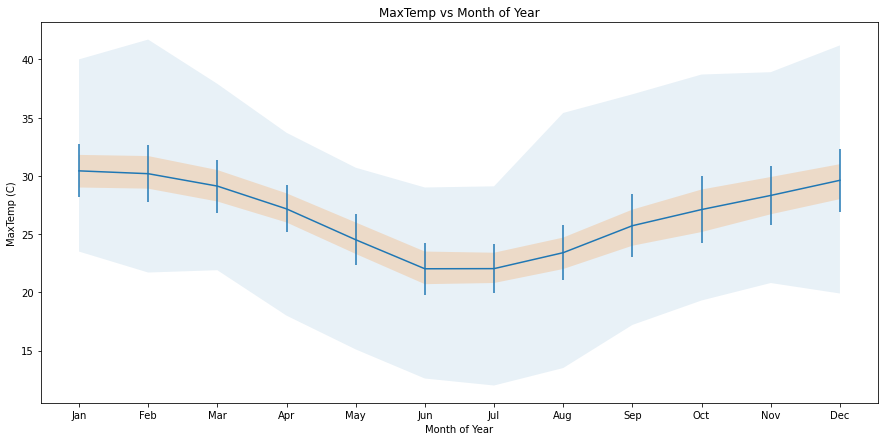

In [30]:
# Add fill_between to the above graph from min to max and also  from 25 percentile to 50 percentile
# Hint, use:
# means = max_temp_by_month.mean()
# ax.fill_between(means.index, max_temp_by_month.min(), max_temp_by_month.max(), alpha=0.1)
# ax.fill_between(means.index, max_temp_by_month.quantile(0.25), max_temp_by_month.quantile(0.75), alpha=0.2)


means = max_temp_by_month.mean()
ax = means.plot(figsize=(15,7), yerr=max_temp_by_month.std())
ax.set_title('MaxTemp vs Month of Year')
ax.set_xlabel('Month of Year')
ax.set_ylabel('MaxTemp (C)')
ax.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.fill_between(means.index, max_temp_by_month.min(), max_temp_by_month.max(), alpha=0.1)
fill2 = ax.fill_between(means.index, max_temp_by_month.quantile(0.25), max_temp_by_month.quantile(0.75), alpha=0.2)
